In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [11]:
# Current amount of stocks
my_msft = 10
my_khc = 10

In [26]:
# Current amount of bonds
my_agg = 10
my_bnd = 10
my_lqd = 10
my_vcit = 10
my_vcsh = 10
my_bndx = 10
my_hyg = 10
my_ief = 10

In [27]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

api = tradeapi.REST(
   alpaca_api_key,
   alpaca_secret_key,
   api_version = "v2"
)

type(alpaca_api_key)
alpaca_api_key

'PKMHTF8JYUP05VFB9Y9L'

In [28]:
# Format current date as ISO format

# Set start and end datetimes of 1 year, between now and 365 days ago.
today = pd.Timestamp("2020-11-03", tz="America/New_York").isoformat()

# Set the tickers
ticker = ["AGG", "BND", "LQD", "VCIT", "VCSH", "BNDX", "HYG", "IEF", "MSFT", "KHC"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# get_barset
df_ticker = api.get_barset(
    ticker,
    timeframe,
    start=today,
    end=today
).df

# Get current closing prices

# Preview DataFrame

df_ticker.head(10)

AGG                                     BND  \
                             open    high     low   close   volume   open   
2020-11-03 00:00:00-05:00  117.22  117.22  117.05  117.15  6215781  87.52   

                                                           ...   VCIT         \
                             high    low   close   volume  ...   open   high   
2020-11-03 00:00:00-05:00  87.539  87.42  87.515  4013300  ...  95.42  95.47   

                                                   VCSH                        \
                             low  close   volume   open   high    low   close   
2020-11-03 00:00:00-05:00  95.34  95.35  7018153  82.68  82.69  82.64  82.675   

                                    
                            volume  
2020-11-03 00:00:00-05:00  2645651  

[1 rows x 50 columns]

In [29]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df_closing_prices["AGG"] = df_ticker["AGG"]["close"]
df_closing_prices["BND"] = df_ticker["BND"]["close"]
df_closing_prices["LQD"] = df_ticker["LQD"]["close"]
df_closing_prices["VCIT"] = df_ticker["VCIT"]["close"]
df_closing_prices["VCSH"] = df_ticker["VCSH"]["close"]
df_closing_prices["BNDX"] = df_ticker["BNDX"]["close"]
df_closing_prices["HYG"] = df_ticker["HYG"]["close"]
df_closing_prices["IEF"] = df_ticker["IEF"]["close"]
df_closing_prices["MSFT"] = df_ticker["MSFT"]["close"]
df_closing_prices["KHC"] = df_ticker["KHC"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

df_closing_prices
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = df_closing_prices["AGG"][0]
bnd_close_price = df_closing_prices["BND"][0]
lqd_close_price = df_closing_prices["LQD"][0]
vcit_close_price = df_closing_prices["VCIT"][0]
vcsh_close_price = df_closing_prices["VCSH"][0]
bndx_close_price = df_closing_prices["BNDX"][0]
hyg_close_price = df_closing_prices["HYG"][0]
ief_close_price = df_closing_prices["IEF"][0]
msft_close_price = df_closing_prices["MSFT"][0]
khc_close_price = df_closing_prices["KHC"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${bnd_close_price}")

Current AGG closing price: $117.15
Current SPY closing price: $87.515


In [30]:
# Compute the current value of shares
# YOUR CODE HERE!

my_agg_value = my_agg*agg_close_price
my_bnd_value = my_bnd*bnd_close_price
my_lqd_value = my_lqd*lqd_close_price
my_vcit_value = my_vcit*vcit_close_price
my_vcsh_value = my_vcsh*vcsh_close_price
my_bndx_value = my_bndx*bndx_close_price
my_hyg_value = my_hyg*hyg_close_price
my_ief_value = my_ief*ief_close_price
my_msft_value = my_msft*msft_close_price
my_khc_value = my_khc*khc_close_price

# Print current value of share
print(f"The current value of your {my_agg} SPY shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_bnd} AGG shares is ${my_bnd_value:0.2f}")

The current value of your 10 SPY shares is $1171.50
The current value of your 10 AGG shares is $875.15


In [31]:
# Create asset mix DataFrame

bonds = my_agg_value+my_bnd_value+my_lqd_value+my_vcit_value+my_vcsh_value+my_bndx_value+my_hyg_value+my_ief_value
shares = my_msft_value+my_khc_value
amount = [bonds],[shares]
df_assets = pd.DataFrame(amount, index=['bonds', 'shares'], columns=['amount'])

# Display asset mix DataFrame
df_assets

,amount
bonds,7793.9
shares,2378.7


array([<AxesSubplot:ylabel='amount'>], dtype=object)

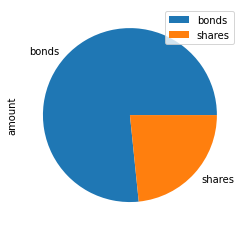

In [32]:
# Plot asset mix pie chart

df_assets.plot.pie(subplots=True)

In [33]:
# Set start and end dates of ten years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2010-11-03', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-03', tz='America/New_York').isoformat()

In [35]:
# Set the ticker information
ticker = ["AGG","BND", "LQD", "VCIT", "VCSH", "BNDX", "HYG", "IEF", "MSFT", "KHC"]

df_assets_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_assets_data.head()

AGG                                      BND  \
                             open    high     low   close  volume     open   
2010-11-03 00:00:00-04:00  108.61  108.82  108.29  108.47  421161  82.7800   
2010-11-04 00:00:00-04:00  108.67  108.99  108.67  108.86  517442  82.8700   
2010-11-05 00:00:00-04:00  108.62  108.75  108.52  108.62  880297  82.7601   
2010-11-08 00:00:00-05:00  108.61  108.75  108.54  108.60  344816  82.6700   
2010-11-09 00:00:00-05:00  108.55  108.60  108.00  108.07  650281  82.6300   

                                                           ...   VCIT         \
                            high    low  close     volume  ...   open   high   
2010-11-03 00:00:00-04:00  82.92  82.52  82.69  1283413.0  ...  82.61  82.61   
2010-11-04 00:00:00-04:00  83.00  82.84  82.97   822084.0  ...  82.70  82.88   
2010-11-05 00:00:00-04:00  82.86  82.61  82.61  1177161.0  ...  82.96  82.96   
2010-11-08 00:00:00-05:00  82.72  82.61  82.65   525850.0  ...  82.70  82.70   
2010-11-09 00:00:00-05:00  82.65  82.19  82.23   482357.0  ...  82.62  82.62   

                                                      VCSH                   \
                             low    close    volume   open    high      low   
2010-11-03 00:00:00-04:00  81.80  81.9500  279421.0  78.46  78.816  78.4600   
2010-11-04 00:00:00-04:00  82.53  82.8800   60441.0  78.97  78.970  78.6200   
2010-11-05 00:00:00-04:00  82.45  82.4701   63131.0  78.56  78.790  78.5600   
2010-11-08 00:00:00-05:00  82.51  82.5700   24030.0  78.72  78.750  78.6512   
2010-11-09 00:00:00-05:00  82.07  82.1459   29367.0  78.73  78.730  78.4700   

                                            
                           close    volume  
2010-11-03 00:00:00-04:00  78.71  105158.0  
2010-11-04 00:00:00-04:00  78.79  115855.0  
2010-11-05 00:00:00-04:00  78.76  161177.0  
2010-11-08 00:00:00-05:00  78.72  149402.0  
2010-11-09 00:00:00-05:00  78.51   90765.0  

[5 rows x 50 columns]

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_tenyear = MCSimulation(
    portfolio_data = df_assets_data,
    weights = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [37]:
# Printing the simulation input data

MC_tenyear.portfolio_data.head()

AGG                                  \
                             open    high     low   close  volume   
2010-11-03 00:00:00-04:00  108.61  108.82  108.29  108.47  421161   
2010-11-04 00:00:00-04:00  108.67  108.99  108.67  108.86  517442   
2010-11-05 00:00:00-04:00  108.62  108.75  108.52  108.62  880297   
2010-11-08 00:00:00-05:00  108.61  108.75  108.54  108.60  344816   
2010-11-09 00:00:00-05:00  108.55  108.60  108.00  108.07  650281   

                                            BND                       ...  \
                          daily_return     open   high    low  close  ...   
2010-11-03 00:00:00-04:00          NaN  82.7800  82.92  82.52  82.69  ...   
2010-11-04 00:00:00-04:00     0.003595  82.8700  83.00  82.84  82.97  ...   
2010-11-05 00:00:00-04:00    -0.002205  82.7601  82.86  82.61  82.61  ...   
2010-11-08 00:00:00-05:00    -0.000184  82.6700  82.72  82.61  82.65  ...   
2010-11-09 00:00:00-05:00    -0.004880  82.6300  82.65  82.19  82.23  ...   

                            VCIT                                   VCSH  \
                             low    close    volume daily_return   open   
2010-11-03 00:00:00-04:00  81.80  81.9500  279421.0          NaN  78.46   
2010-11-04 00:00:00-04:00  82.53  82.8800   60441.0     0.011348  78.97   
2010-11-05 00:00:00-04:00  82.45  82.4701   63131.0    -0.004946  78.56   
2010-11-08 00:00:00-05:00  82.51  82.5700   24030.0     0.001211  78.72   
2010-11-09 00:00:00-05:00  82.07  82.1459   29367.0    -0.005136  78.73   

                                                                          
                             high      low  close    volume daily_return  
2010-11-03 00:00:00-04:00  78.816  78.4600  78.71  105158.0          NaN  
2010-11-04 00:00:00-04:00  78.970  78.6200  78.79  115855.0     0.001016  
2010-11-05 00:00:00-04:00  78.790  78.5600  78.76  161177.0    -0.000381  
2010-11-08 00:00:00-05:00  78.750  78.6512  78.72  149402.0    -0.000508  
2010-11-09 00:00:00-05:00  78.730  78.4700  78.51   90765.0    -0.002668  

[5 rows x 60 columns]

In [38]:
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000392,0.996997,1.002678,1.002734,0.999471,0.999756,0.997680,1.000511,0.998848,0.999504,...,0.998006,1.002379,1.000852,1.000977,0.999488,1.000252,1.000502,0.998643,1.003422,1.005294
2,1.002302,0.994805,1.003405,1.004536,1.001198,0.997651,0.997478,1.003212,0.998938,0.998972,...,0.998269,1.007097,1.006002,1.001225,1.003106,1.006051,1.000907,1.001644,0.999799,1.004918
3,1.003395,0.991212,1.000379,1.004038,0.996856,0.994420,0.998235,1.004349,1.003165,0.997943,...,0.996165,1.006974,1.007100,1.000691,1.003680,1.006710,0.999597,1.001296,0.996082,1.006991
4,1.001592,0.993676,1.001142,1.003939,0.998895,0.993317,1.000385,1.006031,1.000193,1.002644,...,0.999937,1.009194,1.004683,1.004113,1.007519,1.001336,1.001009,0.994938,0.995869,1.008450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.969326,1.500623,1.276912,1.284830,1.106353,1.088827,1.154555,0.980143,1.226390,0.913533,...,1.251964,1.293918,1.514352,0.953328,1.271872,1.086850,1.046750,1.241434,1.272373,1.418748
2517,0.961183,1.500424,1.277182,1.292371,1.102421,1.087406,1.155086,0.980347,1.227142,0.915934,...,1.256745,1.292247,1.514656,0.952864,1.270275,1.085306,1.040855,1.246446,1.275113,1.412395
2518,0.957523,1.495233,1.276237,1.292395,1.105393,1.083356,1.153759,0.985956,1.225844,0.911210,...,1.257527,1.290237,1.517863,0.955771,1.272140,1.084351,1.038477,1.248218,1.277846,1.404888
2519,0.961262,1.503237,1.282561,1.286127,1.097603,1.083054,1.156217,0.982972,1.225510,0.911709,...,1.254940,1.285395,1.515447,0.957770,1.268672,1.080966,1.037847,1.260799,1.281732,1.404771


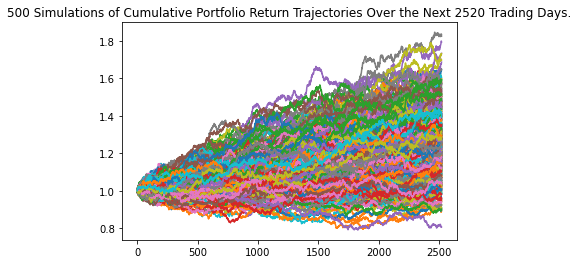

In [39]:
#Plot simulation chart

line_plot_ten = MC_tenyear.plot_simulation()

In [40]:
## Fetch summary statistics from the Monte Carlo simulation results

tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics

print(tbl_ten)

count           500.000000
mean              1.255579
std               0.169623
min               0.806220
25%               1.140150
50%               1.249498
75%               1.356146
max               1.825491
95% CI Lower      0.940794
95% CI Upper      1.587771
Name: 2520, dtype: float64
